# Análise dos Dados do Airbnb - Buenos Aires

### Em tempos de alta no dólar, realizaremos uma análise exploratória acerca das acomodações disponíveis em Buenos Aires, que se mostra uma boa alternativa para os brasileiros frente à alta da moeda americana.

O Airbnb já é considerado como sendo a maior empresa hoteleira da atualidade.

No final de 2018, a Startup fundada 10 anos atrás, já havia hospedado mais de <b> 300 milhões </b> de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal Inside Airbnb, é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de Data Science. http://insideairbnb.com/get-the-data.html

<center>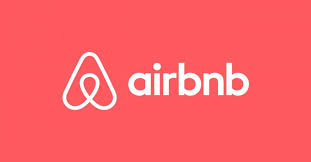</center>

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site Inside Airbnb.

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

listings.csv - Summary information and metrics for listings in Buenos Aires(good for visualisations).

In [4]:
#importando as bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
#importando a base de dados das acomodações relativas a Buenos Aires

df = pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2019-11-25/visualisations/listings.csv")

In [7]:
#identificando as colunas (variáveis) presentes no DataFrame

df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## Dessa forma, pode-se inferir que a base de dados possui as seguintes variáveis:

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

#### Antes de começar a análise propriamente dita, iremos realizar uma identificar as características do *dataset*.

In [8]:
#mostrando as primeiras 5 entradas

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,7270,¡¡Great Loft in Palermo Hollywood!!,18822,Toni,NaN,Palermo,-34.58241,-58.43382,Entire home/apt,2033,20,14,2018-04-30,0.15,1,363
1,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58225,-58.42460,Entire home/apt,3588,2,25,2019-08-13,0.28,1,281
2,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59761,-58.39468,Private room,1435,1,20,2017-12-11,0.17,1,365
3,13095,Standard Room at Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59382,-58.42994,Private room,2691,1,1,2018-12-18,0.09,7,360
4,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59398,-58.42853,Private room,2691,1,0,NaN,NaN,7,360


Agora iremos analisar a quantidade de entradas e variáveis que o *dataset* possui.

In [15]:
#identificando o número de variáveis e entradas

print("Variáveis: \t {}".format(df.shape[1]))
print("Entradas: \t {}".format(df.shape[0]))

#verificar os tipos de dados das variáveis

display(df.dtypes)

Variáveis: 	 16
Entradas: 	 22877


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Uma importante etapa da análise exploratória de um *dataset* é identificar os valores nulos, bem como tratá-los da melhor forma: seja os excluindo, ou substituindo por outros valores, como a média ou a mediana.

In [16]:
#ordenando em ordem decrescente as variáveis por seus valores ausentes

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.281724
last_review                       0.281724
host_name                         0.001005
name                              0.000437
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Em vista da análise acima, percebe-se que: 

* a coluna `neighbourhood_group` possui **100%** dos valores em branco;
* tanto a as colunas `reviews_per_month` quanto as variáveis `last_review` possuem cerca de um quarto de valores nulos;
* as variáveis `host_name` e `name` possuem percentuais inferiores a **0,1%** nulos.

## Tipo de distribuição das variáveis

A fim de identificar a distribuição das variáveis, irei plotar os histogramas.

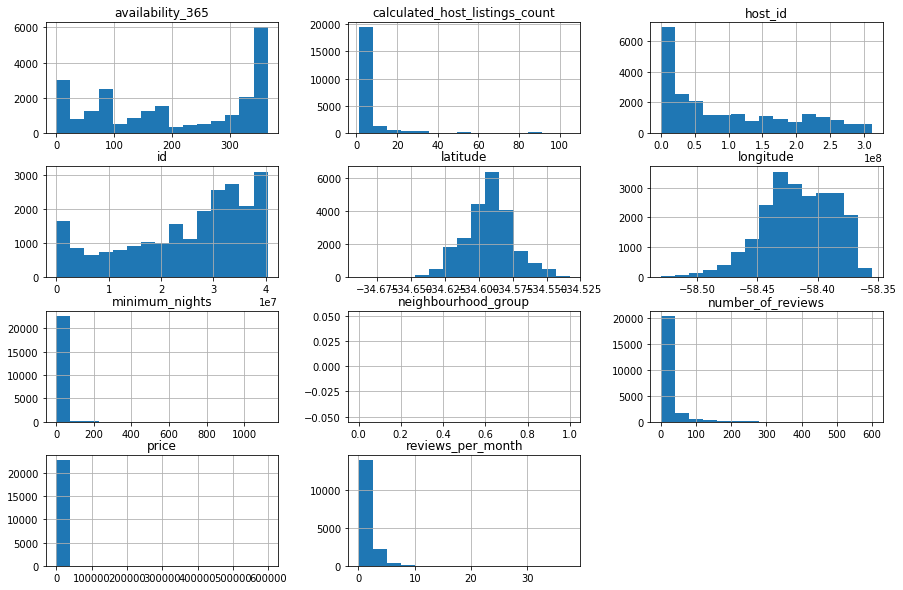

In [17]:
#plotando o histograma das variáveis numéricas

df.hist(bins=15, figsize=(15,10));

Realizando uma breve análise acima, percebe-se que há um grande número de outliers na coluna `price` das acomodações e no mínimo de noites de estadia (`minimum_nights`). Irei realizar uma análise dos outliers mais a profundamente, para limpar meus dados e realizar uma melhor análise.

Dessa forma, os valores não seguem uma distribuição e distorcem toda a representação gráfica. Para confirmar, há duas maneiras ráidas que auxiliam a detecção de *outliers*. São elas:

*Resumo estatístico por meio do método `describe()`

*Plotar `boxplots` para a variável

In [28]:
# ver o resumo estatístico das variáveis numéricas

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,22877.000000,22877.000000,22877.000000,16432.000000,22877.000000,22877.000000
mean,3214.630196,5.653233,15.482974,1.266434,6.296062,202.064912
std,12364.429880,21.513176,31.268565,1.440429,14.748998,134.161675
min,120.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1196.000000,1.000000,0.000000,0.250000,1.000000,83.000000
50%,1973.000000,3.000000,4.000000,0.760000,1.000000,180.000000
75%,2990.000000,4.000000,16.000000,1.810000,4.000000,343.000000
max,597865.000000,1125.000000,600.000000,37.580000,105.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável price possui 75% do valor abaixo de 2990, porém seu valor máximo é 597865 pesos.
* A quantidade mínima de noites (minimum_nights) está acima do limite real de 365 dias no ano (1125??).

#### Boxplot para price

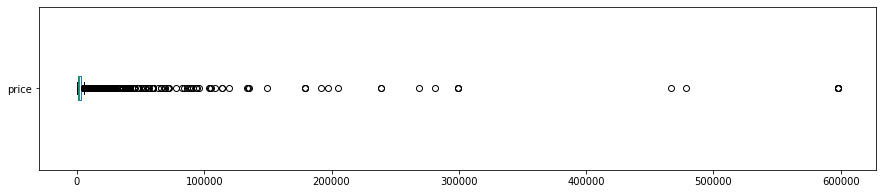


price: valores acima de 6000
1496 entradas
6.5393%


In [22]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 6000 (~2x quartil superior) para price
print("\nprice: valores acima de 6000")
print("{} entradas".format(len(df[df.price > 6000])))
print("{:.4f}%".format((len(df[df.price > 6000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Boxplot para minimum_nights

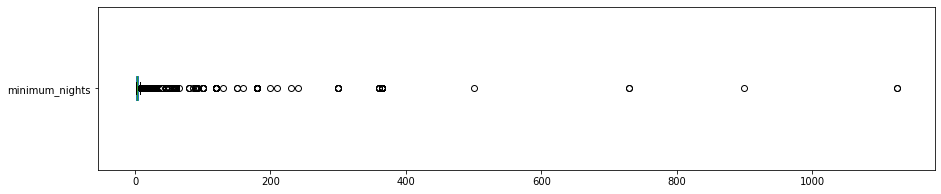

minimum_nights: valores acima de 30:
314 entradas
1.3726%


In [23]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

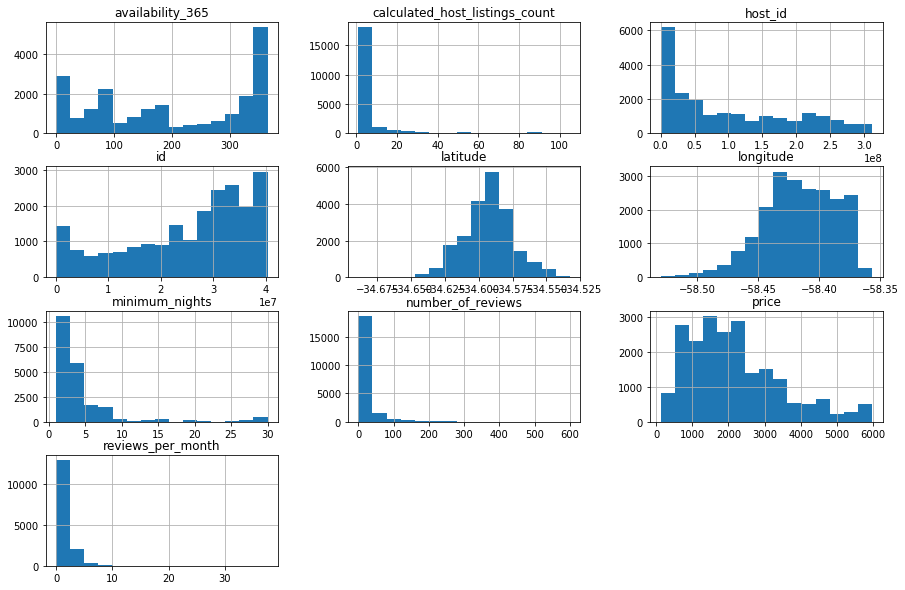

In [25]:
# remover os *outliers* em um novo DataFrame

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 6000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

## Após essa breve análise, na qual pode-se observar que a maioria (+70%) das acomodações possuem diárias de menos de 2500 pesos (170 reais) e um mínimo de duas noites, iremos realizar a análise de correlação das variáveis.

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [26]:
#criando uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.022239,0.050613,-0.002708,0.178453,0.138147
minimum_nights,-0.022239,1.000000,-0.124401,-0.213147,0.103210,0.025399
number_of_reviews,0.050613,-0.124401,1.000000,0.493337,-0.055310,0.052753
reviews_per_month,-0.002708,-0.213147,0.493337,1.000000,-0.090741,-0.072110
calculated_host_listings_count,0.178453,0.103210,-0.055310,-0.090741,1.000000,0.087517
availability_365,0.138147,0.025399,0.052753,-0.072110,0.087517,1.000000


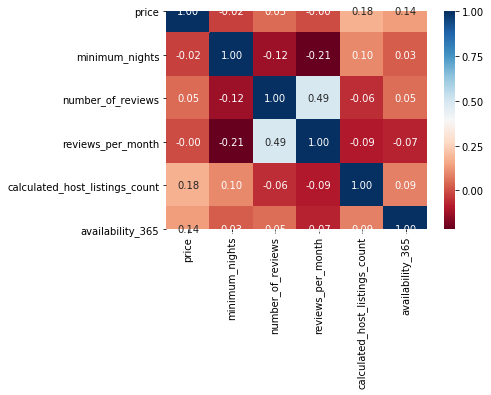

In [27]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### Pode-se observar que o não existe uma correlação muito forte entre as variáveis com o preço. Nem mesmo o número de `reviews` corrobora para um aumento de preço da estadia.

## Analisando o tipo de quarto mais disponível em Buenos Aires

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`

In [29]:
# mostrar a quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()

Entire home/apt    15847
Private room        4440
Shared room          529
Hotel room           274
Name: room_type, dtype: int64

In [30]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.751399
Private room       0.210526
Shared room        0.025083
Hotel room         0.012992
Name: room_type, dtype: float64

## Analisando a localidade mais cara de Buenos Aires

Uma maneira possível de estar verificando uma variável em função da outra é usando `groupby()`. No caso em tela, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.


In [31]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Puerto Madero    3886.976190
Villa Soldati    3527.666667
Palermo          2510.751800
Retiro           2478.626070
Recoleta         2403.195392
San Telmo        2178.594136
Versalles        2122.700000
Belgrano         2094.748707
Nuñez            2085.372208
San Nicolas      2076.905901
Name: price, dtype: float64

In [33]:
# ver quantidade de imóveis em Puerto Madero

print(df[df.neighbourhood == "Puerto Madero"].shape)

(243, 16)


## Para finalizar esta análise, irei mapear a disponibilidade de imóveis em cada ponto da cidade em um plano cartesiano, onde `x = longitude` e `y = latidude`.

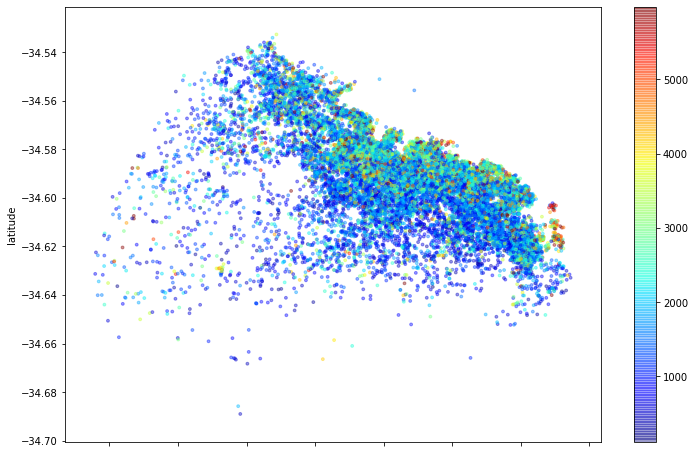

In [34]:
#plotando os imóveis pela latitude-longitude

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Infere-se do caso apresentado que Buenos Aires possui um bom custo-benefício para os brasileiros, em virtude da valorização do Real frente ao Peso Argentino.

Em virtude das análises apresentadas, constata-se que a cidade possui muitas habitações disponíves para serem alugadas, sendo mais de **15 mil** apartamentos inteiros. Outra ponto que merece destaque é que o noroeste da cidade possui a maior oferta de acomodações, pois possui maior apelo turístico e comercial. 

Nessas áreas são encontrados os imóveis mais caros a serem alugados, sendo Puerto Madero o mais caro (média de 3800 pesos argentinos por noite, aprox. R$ 266,00 (o que pode se dizer que é uma boa opção de destino, pois é uma área nobre com as melhores acomodações e inúmeras atrações turísticas e gastronômicas).

Portanto, não só a Disneylândia é um destino internacional possível para as classes mais baixas, uma vez que existem boas opções de viagens internacionais com um bom custo para os brasileiros.